# US Renewable Energy Consumption

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/renewable-energy-consumption-in-the-u-s/dataset.csv


***#Reference: https://www.kaggle.com/code/hainescity/renewalbe-energy-consumption-eda-analysis***

## About Dataset

This dataset provides monthly data on renewable energy consumption in the United States from January 1973 to December 2024, broken down by energy source and consumption sector. The data is sourced from the U.S. Energy Information Administration (EIA).

Renewable energy has become an increasingly important part of the U.S. energy mix in recent years as the country seeks to reduce its greenhouse gas emissions and dependence on fossil fuels. This dataset allows for detailed analysis of renewable energy trends over time and across different sectors of the economy.

IMPORTANT: Dataset Info

Every entry that has a value of 0 means that the datapoint was either "Not Available," "No Data Reported," or "Not Meaningful"

You most likely want to exclude the column titled Total Renewable Energy from your comparative analysis across fuel types as it represents the sum of the others

Credits

This data was sourced from the U.S. Energy Information Administration.

Image credits: Earth.Org, Environment America

**Columns**

**Year** The calendar year of the data point

**Month** The month number (1-12) of the data point

**Sector**	The energy consumption sector (Commercial, Electric Power, Industrial, Residential, or Transportation)

**Hydroelectric Power**	Hydroelectric power consumption in the given sector and month, in trillion BTUs

**Geothermal Energy**	Geothermal energy consumption in the given sector and month, in trillion BTUs

**Solar Energy**	Solar energy consumption in the given sector and month, in trillion BTUs

**Wind Energy**	Wind energy consumption in the given sector and month, in trillion BTUs

**Wood Energy**	Wood energy consumption in the given sector and month, in trillion BTUs

**Waste Energy**	Waste energy consumption in the given sector and month, in trillion BTUs

**"Fuel Ethanol, Excluding Denaturant"**	Fuel ethanol (excluding denaturant) consumption in the given sector and month, in trillion BTUs

**Biomass Losses and Co-products**	Biomass losses and co-products in the given sector and month, in trillion BTUs

**Biomass Energy**	Total biomass energy consumption (sum of wood, waste, ethanol, and losses/co-products) in the given sector and month, in trillion BTUs

**Total Renewable Energy**	Total renewable energy consumption (sum of hydroelectric, geothermal, solar, wind, and biomass) in the given sector and month, in trillion BTUs

**Renewable Diesel Fuel**	Renewable diesel fuel consumption in the given sector and month, in trillion BTUs

**Other Biofuels**	Other biofuels consumption in the given sector and month, in trillion BTUs

**Conventional Hydroelectric Power**	Conventional hydroelectric power consumption in the given sector and month, in trillion BTUs

**Biodiesel**	Biodiesel consumption in the given sector and month, in trillion BTUs


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio

import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

## Downloading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/renewable-energy-consumption-in-the-u-s/dataset.csv')


In [4]:
# Check first 5 lines

df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


## Inspecting and Cleaning Dataframe Structure

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (3065, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Year,int64,0,0.0,0,52,3065,1973.0,2024.0,1998.042414,14.747378,1973,1973,1973
Month,int64,0,0.0,0,12,3065,1.0,12.0,6.491028,3.456934,1,1,1
Sector,object,0,0.0,0,5,3065,NaN,NaN,NaN,NaN,Commerical,Electric Power,Industrial
Hydroelectric Power,float64,0,0.0,0,509,3065,-0.002,2.047,0.169759,0.373819,0.0,0.0,1.04
Geothermal Energy,float64,0,0.0,0,750,3065,0.0,5.951,1.146369,1.550857,0.0,0.49,0.0
Solar Energy,float64,0,0.0,0,1054,3065,0.0,64.04,2.015008,5.774511,0.0,0.0,0.0
Wind Energy,float64,0,0.0,0,473,3065,0.0,157.409,4.282404,18.124793,0.0,0.0,0.0
Wood Energy,float64,0,0.0,0,1606,3065,0.0,183.628,36.644408,46.900639,0.57,0.054,98.933
Waste Energy,float64,0,0.0,0,1381,3065,0.0,32.875,5.820124,8.247359,0.0,0.157,0.0
"Fuel Ethanol, Excluding Denaturant",float64,0,0.0,0,939,3065,0.0,104.42,6.976648,21.91192,0.0,0.0,0.0


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> No Missing, No duplicates.</div>

In [6]:
# The 2024 data is incomplete. So, let's delete them.

index_names = df[ df['Year'] == 2024 ].index

df.drop(index_names, inplace = True)

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Ok, partial cleaning of the dataset is carried out only for executing and visualizing the data.</div>

## EDA

### 5.1 Types of Energy

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>IMPORTANT:</b> At this point we will exclude column 'Total Renewable Energy', because this column represents the sum of other energies. Let's analyze the column 'Total Renewable Energy' further.</div>

In [7]:
# Columns, Sectors and Colors

cols = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
       'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power',
       'Biodiesel']

sectors = ['Commerical', 'Electric Power', 'Industrial', 'Residential',
           'Transportation']

colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E"]

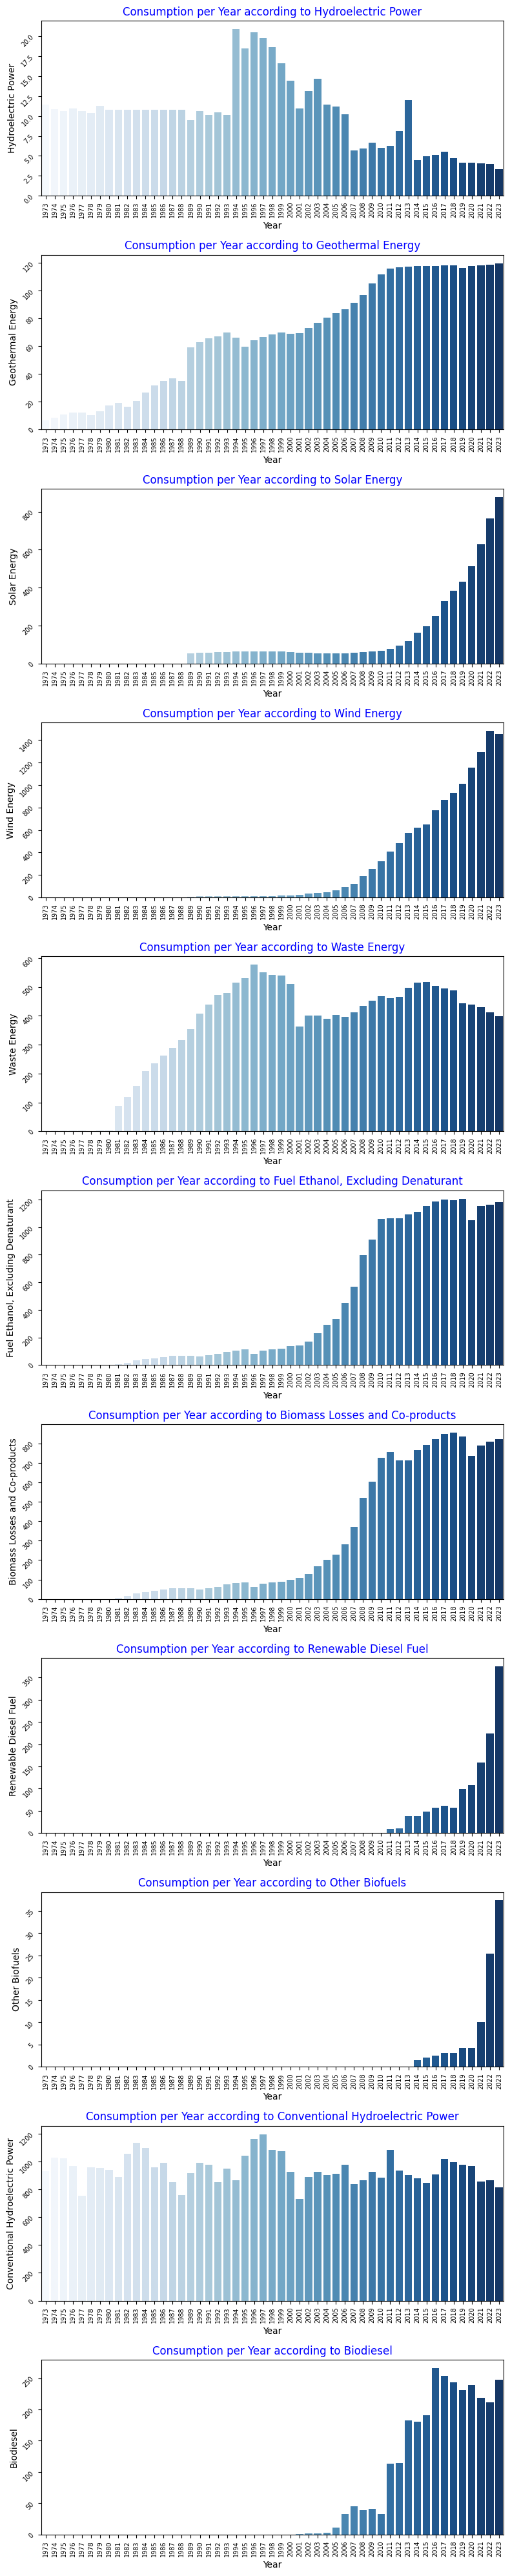

In [8]:
# Energy per Year

fig, axes = plt.subplots(11, 1, figsize=(8, 40))

for ind, col in enumerate(cols):
    plt.subplot(11, 1, ind+1)
    df_top = df.groupby(['Year'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False)

    sns.barplot(x=df_top["Year"], y=df_top[col], palette="Blues")
    plt.yticks(rotation=45, fontsize = 7)
    plt.xticks(rotation=90, fontsize = 7)   
    plt.title(f"Consumption per Year according to {col}", fontsize = 12, color = 'blue')

plt.tight_layout()

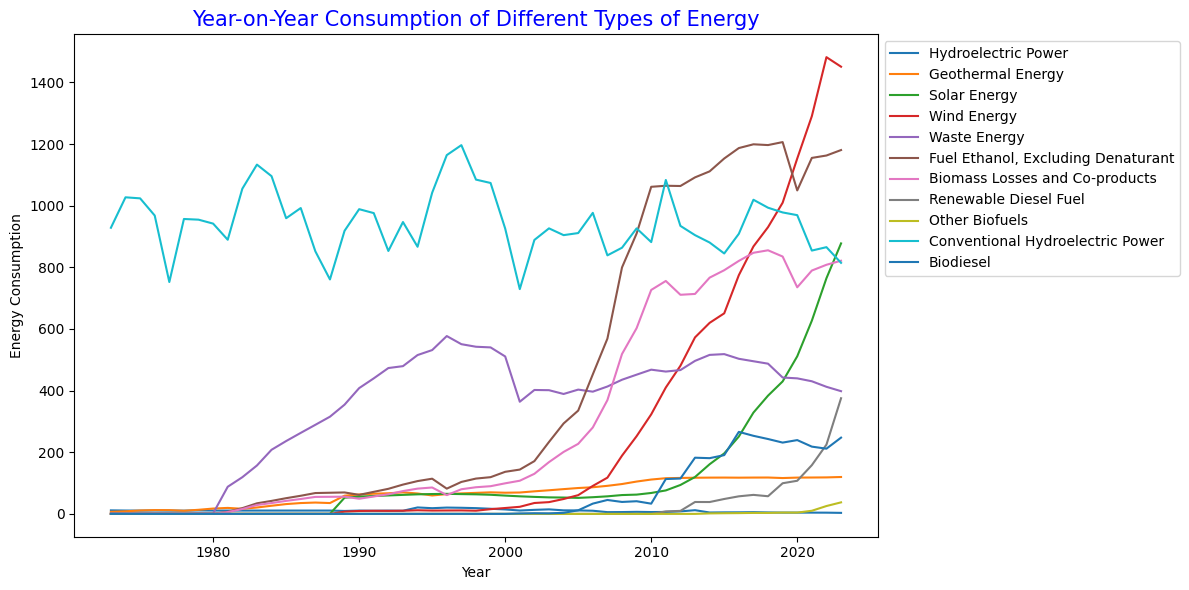

In [9]:
# Year-on-Year Consumption of Different Types of Energy

df_year = df.groupby('Year').sum().reset_index().drop(columns=['Month', 'Sector'])
plt.figure(figsize=(12, 6))
for energy_type in cols:
    plt.plot(df_year['Year'], df_year[energy_type], label=energy_type)

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title(f'Year-on-Year Consumption of Different Types of Energy',  fontsize = 15, color = 'blue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  In this graph we can see that from the year 2000 onwards an accelerated growth of some energies, with emphasis on wind energy and solar energy</div>

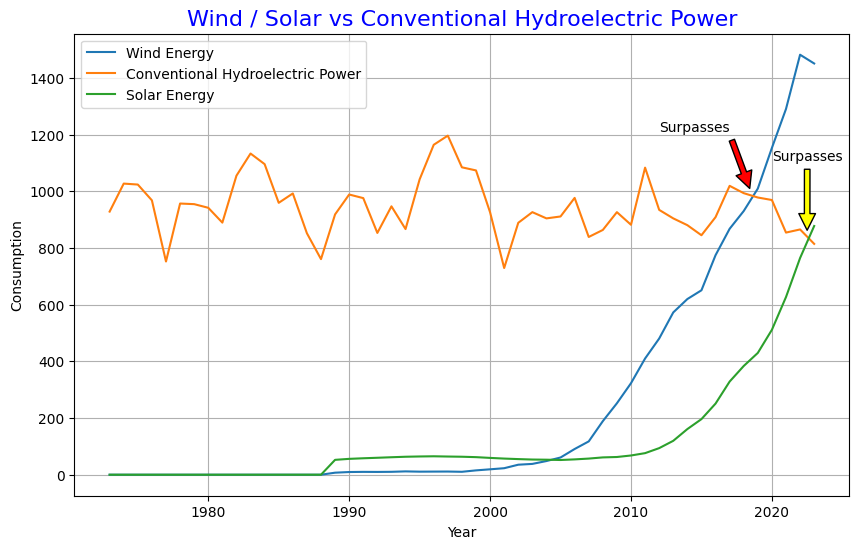

In [10]:
 # Wind / Solar vs Conventional Hydroelectric Power
    
df_year = df.groupby('Year').sum().reset_index().drop(columns=['Month', 'Sector'])

# Plot
df_year.plot(x="Year", y=['Wind Energy', 'Conventional Hydroelectric Power', 'Solar Energy'],
        kind="line", figsize=(10, 6))
plt.title("Wind / Solar vs Conventional Hydroelectric Power", fontsize = 16, color = 'blue')
plt.ylabel('Consumption', rotation=90, fontsize = 10)
plt.annotate('Surpasses',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2012, 1200),
      xy = (2018.5, 1000),
      arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.annotate('Surpasses',
      horizontalalignment = 'left',
      verticalalignment = 'bottom',
      xytext = (2020, 1100),
      xy = (2022.5, 850),
      arrowprops = dict(facecolor = 'yellow', shrink = 0.05))

plt.grid()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  The red arrow shows the moment when Wind Energy consumption exceeds Conventional Hydroelectric Power consumption.
The yellow arrow shows the moment when the consumption of Solar Energy exceeds the consumption of Conventional Hydroelectric Power.</div>

### 5.2 Sector

In [11]:
df['Sector'].unique()

array(['Commerical', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

In [12]:
# Top Sectors per Type of Energy

for i in cols:
    
    if i == 'Hydroelectric Power':

        df_top = df.groupby(['Sector'])[['Hydroelectric Power']].sum()#.reset_index()
        df_top = df_top.sort_values(by=("Hydroelectric Power"), ascending=False).head(10)

        iplot(px.bar(df_top[:10],
             text_auto = True,
             color = df_top[:10].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top Sectors acording to Hydroelectric Power Consumption'
            ))   
    
    else:
        
        df_top = df.groupby(['Sector'])[[i]].sum()#.reset_index()
        df_top = df_top.sort_values(by=[i], ascending=False).head()

        iplot(px.bar(df_top[:5],
             text_auto = True,
             color = df_top[:5].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top Sectors acording to ' +i+ ' Consumption'
             ))

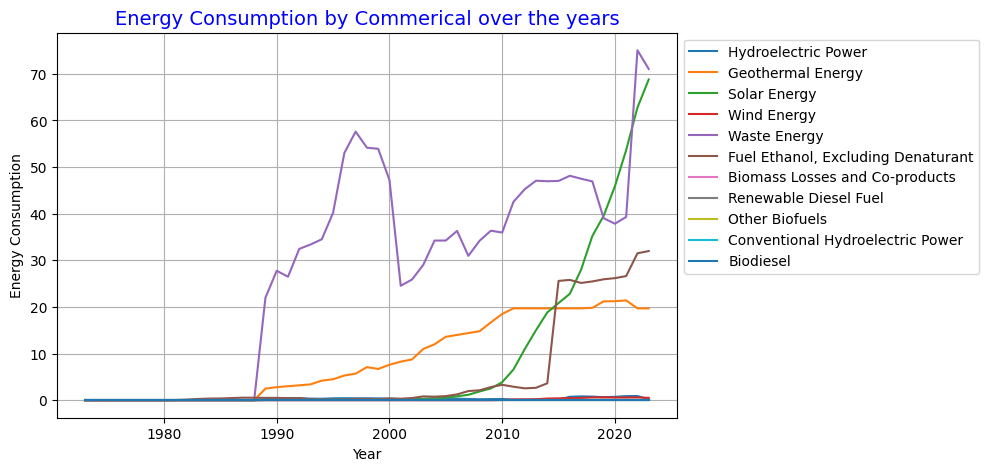

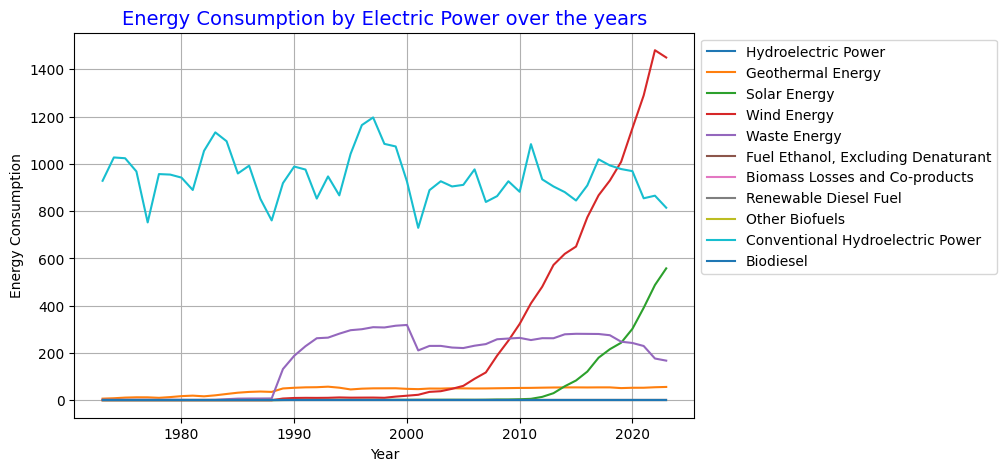

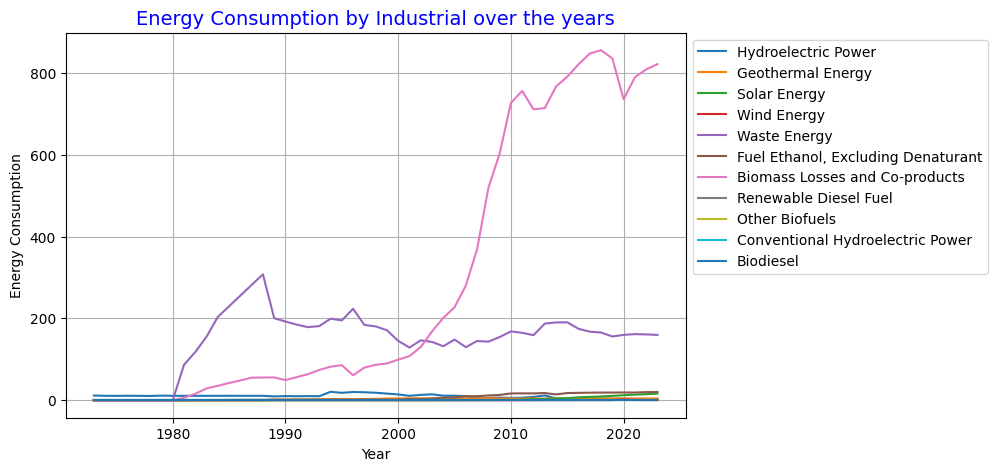

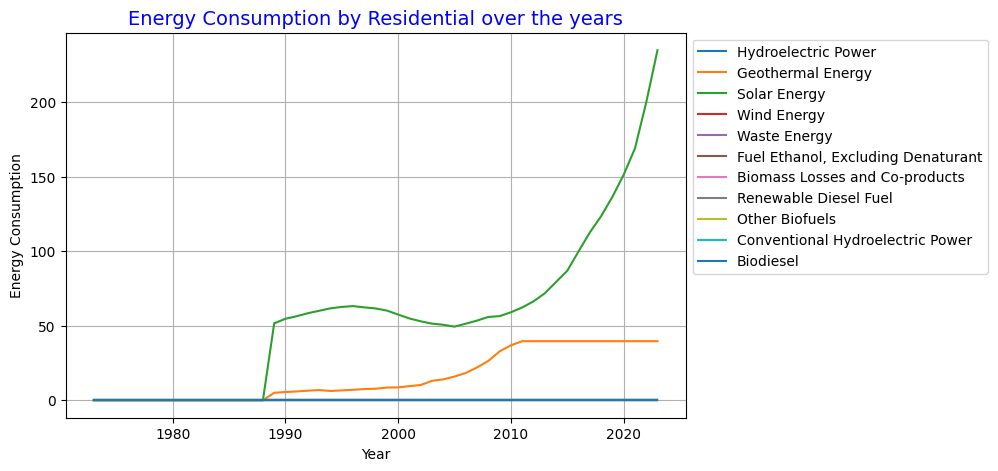

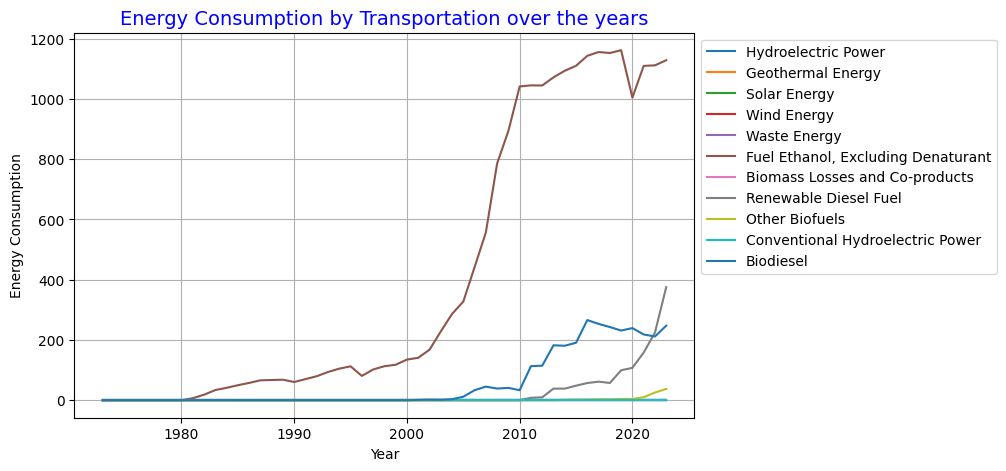

In [13]:
# Energy Consumption by Sectors over the years

for i in sectors:
    
    if i == 'Commerical':
        df_sec = df[df['Sector'] == 'Commerical']
        df_sec = df_sec.groupby('Year')[cols].sum().reset_index()

        df_sec.plot(x="Year", y=cols, kind="line", figsize=(8, 5))
        plt.title("Energy Consumption by Commerical over the years", fontsize = 14, color = 'blue')
        plt.ylabel('Energy Consumption', rotation=90, fontsize = 10)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        plt.grid()
        plt.show()
    else:
        df_sec = df[df['Sector'] == i]
        df_sec = df_sec.groupby('Year')[cols].sum().reset_index()

        df_sec.plot(x="Year", y=cols, kind="line", figsize=(8, 5))
        plt.title(f"Energy Consumption by {i} over the years", fontsize = 14, color = 'blue')
        plt.ylabel('Energy Consumption', rotation=90, fontsize = 10)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        plt.grid()
        plt.show()

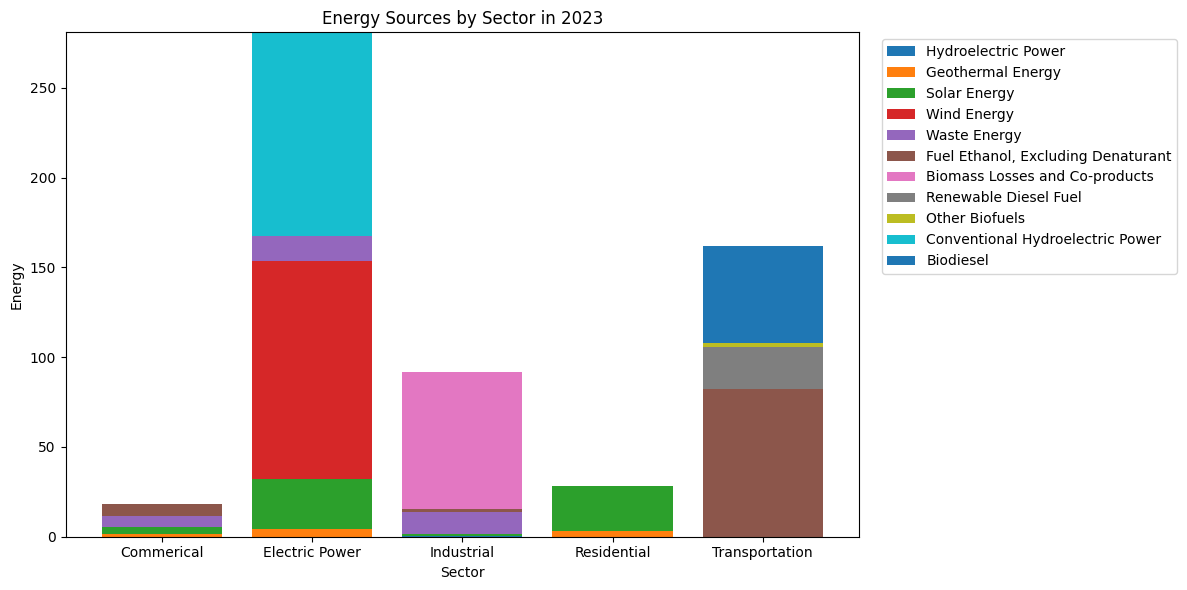

In [14]:
# Energy Sources by Sector in 2023

df_2023 = df[df['Year'] == 2023]

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(df_2023))
for source in cols:
    plt.bar(df_2023['Sector'], df_2023[source], bottom=bottom, label=source)
    bottom += df_2023[source]
plt.xlabel('Sector')
plt.ylabel('Energy')
plt.title(f'Energy Sources by Sector in 2023')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

In [15]:
# Create a column with the total of energy types.
df['Total_Energy'] = df['Hydroelectric Power'] + df['Geothermal Energy'] + df['Solar Energy']+ df['Wind Energy'] + df['Wood Energy'] + df['Waste Energy'] + df['Fuel Ethanol, Excluding Denaturant'] + df['Biomass Losses and Co-products'] + df['Biomass Energy'] + df['Renewable Diesel Fuel'] + df['Other Biofuels'] + df['Conventional Hydroelectric Power'] + df['Biodiesel']

In [16]:
 # Total_Energy per Sector

# Create datasets
df_com = df[df['Sector'] == 'Commerical']
df_ele = df[df['Sector'] == 'Electric Power']
df_ind = df[df['Sector'] == 'Industrial']
df_res = df[df['Sector'] == 'Residential']
df_tra = df[df['Sector'] == 'Transportation']

# Groupby - Year
df_com = df_com.groupby('Year')['Total_Energy'].sum().reset_index()
df_ele = df_ele.groupby('Year')['Total_Energy'].sum().reset_index()
df_ind = df_ind.groupby('Year')['Total_Energy'].sum().reset_index()
df_res = df_res.groupby('Year')['Total_Energy'].sum().reset_index()
df_tra = df_tra.groupby('Year')['Total_Energy'].sum().reset_index()

# Rename columns
df_com.rename(columns = {'Total_Energy':'Commerical'}, inplace = True)
df_ele.rename(columns = {'Total_Energy':'Electric Power'}, inplace = True)
df_ind.rename(columns = {'Total_Energy':'Industrial'}, inplace = True)
df_res.rename(columns = {'Total_Energy':'Residential'}, inplace = True)
df_tra.rename(columns = {'Total_Energy':'Transportation'}, inplace = True)

# Concat datasets 
total_energy = pd.concat([df_com, df_ele, df_ind, df_res, df_tra])

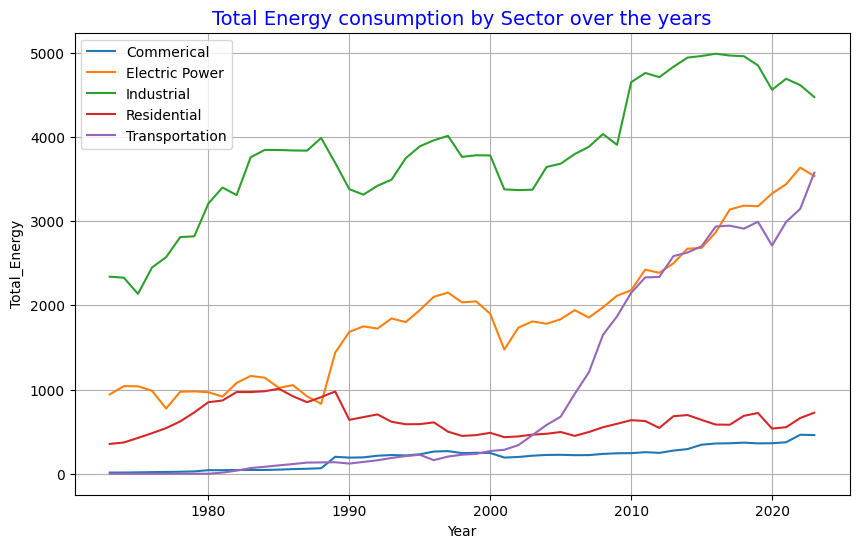

In [17]:
# TotalEnergy consumption by Sector over the years

total_energy.plot(x="Year", y=['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation'],
              kind="line", figsize=(10, 6))
plt.title("Total Energy consumption by Sector over the years", fontsize = 14, color = 'blue')
plt.ylabel('Total_Energy', rotation=90, fontsize = 10)

plt.grid()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  Above we can see that there was an increase in energy consumption in almost all sectors, but with special emphasis on the Transport sector. The only sector with stable consumption is Residential.</div>

### 5.3 Total Renewable Energy

In [18]:
# Total Renewable Energy

# Create dataset copy
df_tot_ren = df.copy()

# Groupby - Year
df_tot_ren = df_tot_ren.groupby('Year')[['Total Renewable Energy','Total_Energy']].sum().reset_index()


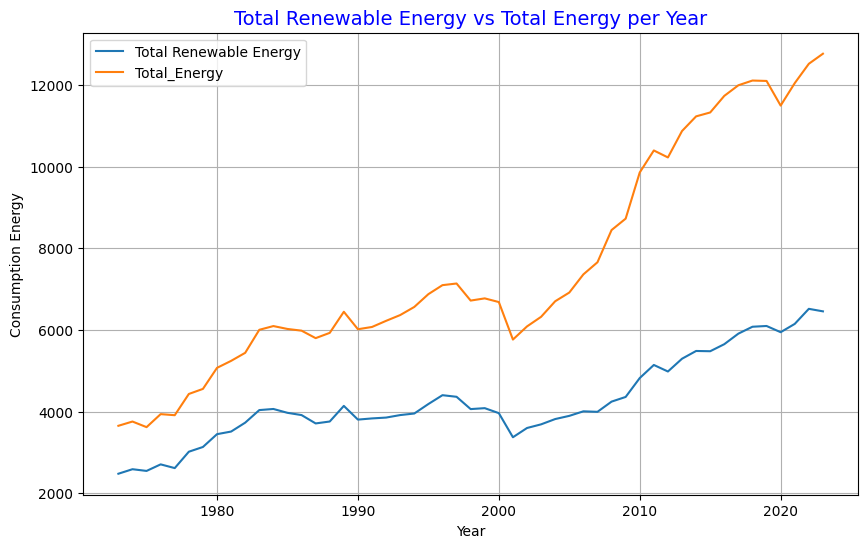

In [19]:
# Total Renewable Energy / Total_Energy X Years
df_tot_ren.plot(x="Year", y=['Total Renewable Energy', 'Total_Energy'],
              kind="line", figsize=(10, 6))
plt.title("Total Renewable Energy vs Total Energy per Year", fontsize = 14, color = 'blue')
plt.ylabel('Consumption Energy', rotation=90, fontsize = 10)

plt.grid()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  Analyzing the graph above, we see that the 'Total Renewable Energy' consumption is increasing, but the 'Total_Energy' consumption is also increasing.</div>

In [20]:
# Create a column with the percentage of Total Renewable Energy in relation to Total_Energy

df_tot_ren['%_Renewable_Energy'] = (df_tot_ren['Total Renewable Energy'] / df_tot_ren['Total_Energy']) * 100

df_tot_ren= df_tot_ren.fillna(0)

df_tot_ren['%_Renewable_Energy'] = round((df_tot_ren['%_Renewable_Energy']), 2)

In [21]:
df_tot_ren.head()

,Year,Total Renewable Energy,Total_Energy,%_Renewable_Energy
0,1973,2475.547,3650.519,67.81
1,1974,2586.002,3754.710,68.87
2,1975,2544.167,3617.491,70.33
3,1976,2704.699,3936.446,68.71
4,1977,2613.470,3910.019,66.84


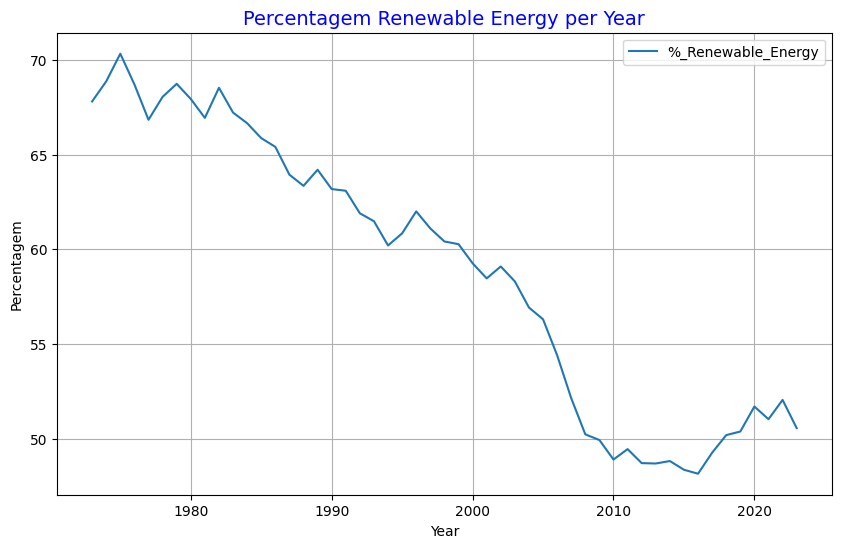

In [22]:
# Percentagem Renewable Energy
df_tot_ren.plot(x="Year", y=['%_Renewable_Energy'],
              kind="line", figsize=(10, 6))
plt.title("Percentagem Renewable Energy per Year", fontsize = 14, color = 'blue')
plt.ylabel('Percentagem', rotation=90, fontsize = 10)

plt.grid()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#001BC7;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  Although there has been an increase in Renewable Energy consumption over the years, there has been an even greater increase in Total Energy. This is demonstrated in the graph above, where a reduction in the percentage of Renewable Energy is observed.</div>